# Gamma Correction

Faisal Qureshi      
http://www.vclab.ca

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_intensities_image(intensities, width=8, height=32):
    """
    intensities: a numpy array containing intensities between 0.0 an 1.0
    width: width in pixels for each itensity, total width of the image is (width x len(intensities)) 
    height: height in pixels

    returns image that can be plotted as plt.imshow(image, cmap=gray)
    """

    n = len(intensities)
    image = np.ones((height, n*width))
    for i in range(n):
        image[:, i*width:(i+1)*width] = image[:, i*width:(i+1)*width] * intensities[i]

    return image

In [3]:
def show_intensities(intensities, width, height, title=None):
    """
    Plot intensities as gray scale image. 
    """

    intensities_image = make_intensities_image(intensities, width, height) 
    
    plt.figure()
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    if title:
        plt.title(title)
    plt.imshow(intensities_image, cmap='gray');

In [4]:
def gamma_shifted(intensities, gamma):
    """
    intensities: numpy array containing intensities values between 0.0 and 1.0
    gamma: either 2.2 or 1/2.2

    return gamma shifted intensities
    """
    return np.power(intensities, gamma)

In [5]:
def quantize(intensities, bits):
    distinct_values = np.power(2, bits)
    values = np.linspace(0, 1, distinct_values)

    quantized_intensities = np.empty(intensities.shape)
    for i in range(len(intensities)):
        j = np.argmin( np.abs(intensities[i] - values) )
        quantized_intensities[i] = values[j]

    return quantized_intensities

In [6]:
intensities = np.linspace(0,1,256)
#print(intensities)

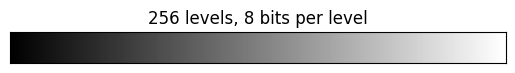

In [7]:
show_intensities(intensities, width=16, height=256, title='256 levels, 8 bits per level')

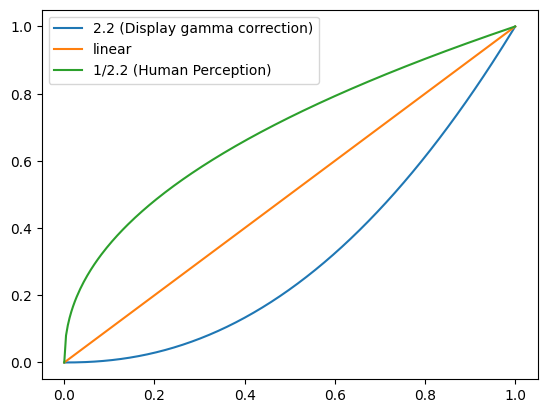

In [8]:
plt.figure()
plt.plot(intensities, gamma_shifted(intensities, 2.2), label='2.2 (Display gamma correction)')
plt.plot(intensities, intensities, label='linear')
plt.plot(intensities, gamma_shifted(intensities, 1/2.2), label='1/2.2 (Human Perception)')
plt.legend();

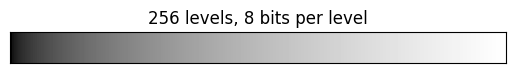

In [9]:
perceived_intensities = gamma_shifted(intensities, 1/2.2)
show_intensities(perceived_intensities, width=16, height=256, title='256 levels, 8 bits per level')

In [10]:
gamma_corrected_intensities = gamma_shifted(intensities, 1/2.2)

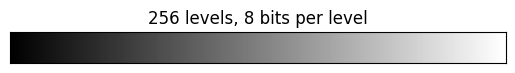

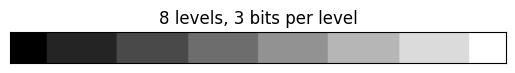

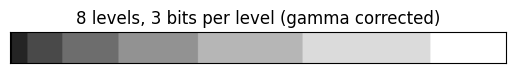

In [13]:
number_of_bits = 3

show_intensities(intensities, width=16, height=256, title='256 levels, 8 bits per level')

q_intensities = quantize(intensities, number_of_bits)
show_intensities(q_intensities, width=16, height=256, title=f'{2**number_of_bits} levels, {number_of_bits} bits per level')

q_intensities2 = quantize(gamma_corrected_intensities, number_of_bits)
show_intensities(q_intensities2, width=16, height=256, title=f'{2**number_of_bits} levels, {number_of_bits} bits per level (gamma corrected)')